In [4]:
#importing required libraries
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#creating the dataset for classification from make_classification
X,y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0,
                          n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False,
                          class_sep = 10)
X.shape, y.shape

((100, 2), (100,))

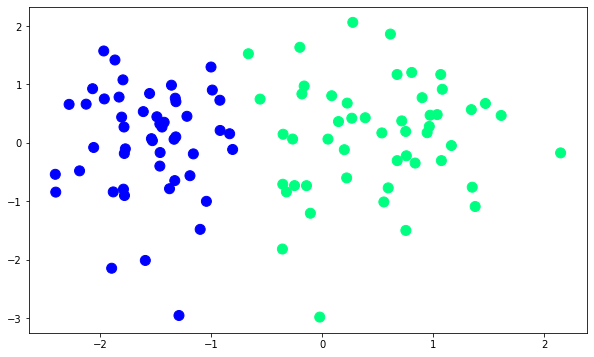

In [12]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1],c=y, cmap = 'winter', s = 100)

In [15]:
# X.shape[0]

100

In [18]:
# np.ones(X.shape[1])

array([1., 1.])

In [25]:
def step(z):
    return 1 if z > 0 else 0 

In [24]:
# step(np.dot(X[0], [1,1]))

1

In [32]:
# 2*X[0] - [0.1, 0.1]

array([ 0.29849489, -0.33395104])

In [52]:
def perceptron(X,y, epochs=1000, lr = 0.1):
    # inserting 1 to the start of the matrix
    X = np.insert(X,0,1, axis = 1)
    #we are using X.shape[1] in the below statement as we have already added the additional column with value 1 to X
    weights = np.ones(X.shape[1])
#     lr = 0.1
    
    for j in range(epochs):
        j = np.random.randint(0, X.shape[0])
        
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    
    return weights[0], weights[1:]

In [53]:
intercept_, coef_ = perceptron(X,y)

In [54]:
intercept_, coef_

(0.9, array([1.36045423, 0.18856859]))

In [55]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
m, b

(-7.214638686493643, -4.772799175914423)

In [57]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3, 2)

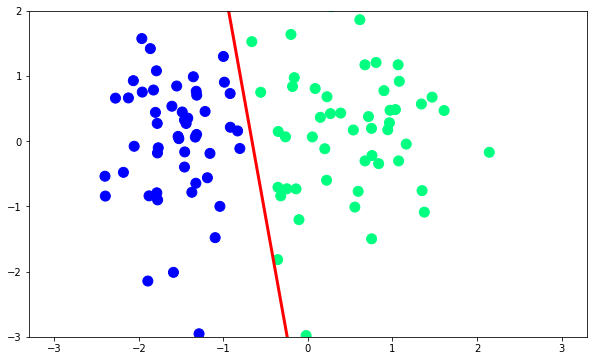

In [60]:
plt.figure(figsize = (10,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(X[:,0], X[:,1],c=y, cmap = 'winter', s = 100)
plt.ylim(-3,2)

### Comparing this with the actual scikit learn logistic regression class and understanding why perceptron trick is not enough

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [62]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])
m, b

(-127.34979670277563, array([-81.91311981]))

In [65]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3, 2)

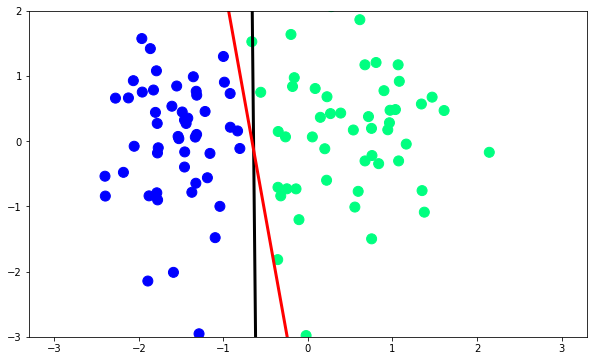

In [66]:
plt.figure(figsize = (10,6))
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3)
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(X[:,0], X[:,1],c=y, cmap = 'winter', s = 100)
plt.ylim(-3,2)

In [68]:
# we can see that logistic regression line is more generalized compared to the perceptron trick line, 
# better realized if we change the class_sep parameter for make_classification to 20 or higher
# this is because for perceptron trick there wont be further calculation once 
# the line has separated the classes well